In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from scipy import stats as scipy
%matplotlib inline

In [2]:
data = pd.read_csv('DataSets/weight-height.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Sexo      10000 non-null object
Altura    10000 non-null float64
Peso      10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [5]:
data.columns = ['Sexo', 'Altura', 'Peso']

In [7]:
#Converter de pol para cm
data['Altura_cm'] = data['Altura']*2.54

#Converter de libra para kg
data['Peso_kg'] = data['Peso']*0.453592

In [27]:
#Gerar 200 médias amostrais de 50 amostras
medias_amostrais = []
for _ in range(200):
    media = data['Peso_kg'].sample(n=50).mean()
    medias_amostrais.append(media)

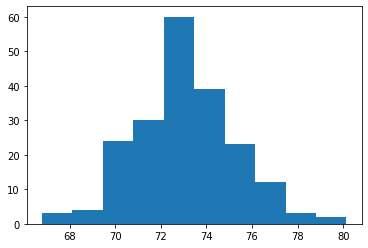

In [28]:
plt.hist(medias_amostrais)
plt.show()

In [29]:
#Gerar 200 médias amostrais de 50 amostras
medias_amostrais = []
for _ in range(200):
    media = data['Peso'].sample(n=50).mean()
    medias_amostrais.append(media)

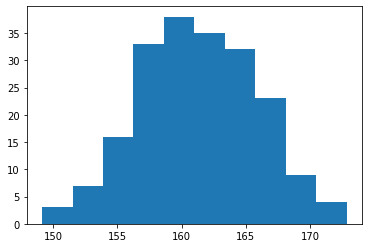

In [30]:
plt.hist(medias_amostrais)
plt.show()

## Regressão Linear

In [61]:
faturamento = [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]

In [62]:
mes = list(range(1,13))

In [63]:
data_dict = {'mes': mes, 'faturamento': faturamento}

In [64]:
data_dict

{'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]}

In [65]:
data = pd.DataFrame.from_dict(data_dict)

In [66]:
data.head()

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82


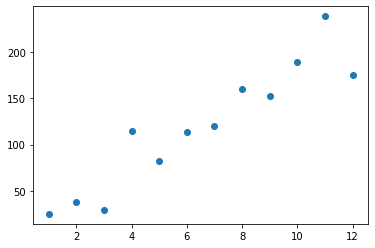

In [94]:
plt.scatter(x=data['mes'], y=data['faturamento'])
plt.show()

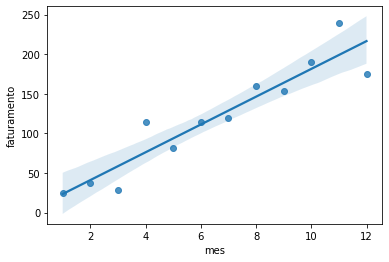

In [93]:
sns.regplot(x=data['mes'], y=data['faturamento'])
plt.show()

In [69]:
data.corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


In [145]:
#Equação da Regressão Linear na unha
x = data['mes']
y = data['faturamento']
n = len(data['mes'])

m = ((n * sum(x*y)) - (x.sum() * y.sum())) / (n * sum(x**2) - (sum(x)**2))

b = (y.sum() - (m * x.sum())) / n


In [79]:
#Predicao para o mes xpred
xpred = 13
ypred = m*xpred + b
ypred

234.0

In [80]:
pred_manual = []
for elemento in x:
    ypred = m*elemento+b
    pred_manual.append(ypred)

In [81]:
data['predicao'] = pred_manual

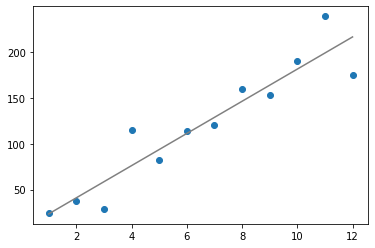

In [96]:
plt.scatter(x=data['mes'], y=data['faturamento'])
plt.plot(data['mes'],data['predicao'], color='grey')
plt.show()

In [112]:
#Coeficiente de Determinação - R-quadrado(R²)
data['residuos'] = data['faturamento'] - data['predicao']
data['media_faturamento'] = data['faturamento'].mean()
SQres = (data['residuos']**2).sum()
SQtot = ((data['faturamento'] - data['media_faturamento'])**2).sum()
r_quadrado = 1-SQres/SQtot
r_quadrado

0.8743085179578918

In [117]:
#Raiz do Erro Quadrático Médio
#rmse = math.sqrt((data['residuos']**2/n).sum())
rmse = np.sqrt((SQres/n).sum())
rmse

22.95564284574794

In [121]:
#Desvio padrão para aplicar Regra Empírica 68 - 95 - 99.7
um_acima = data['predicao']+rmse
um_abaixo = data['predicao']-rmse
dois_acima = data['predicao']+2*rmse
dois_abaixo = data['predicao']-2*rmse
tres_acima = data['predicao']+3*rmse
tres_abaixo = data['predicao']-3*rmse

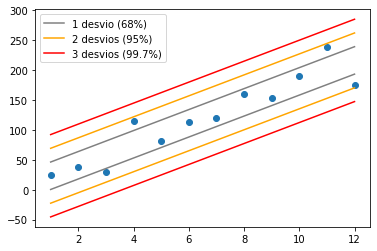

In [140]:
fig, ax = plt.subplots()
ax.scatter(data['mes'], data['faturamento'])
line1 = ax.plot(x, um_acima, color='grey', label='1 desvio (68%)')
line2 = ax.plot(x, um_abaixo, color='grey')
line3 = ax.plot(x, dois_acima, color='orange', label='2 desvios (95%)')
line4 = ax.plot(x, dois_abaixo, color='orange')
line5 = ax.plot(x, tres_acima, color='red', label='3 desvios (99.7%)')
line6 = ax.plot(x, tres_abaixo, color='red')
ax.legend()
plt.show()

## Regressão Linear com Statsmodels

In [147]:
#Definir x, y da função
x = data['mes']
y = data['faturamento']

#Adicionar constante ao x
x = sm.add_constant(x.values)

In [148]:
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

In [149]:
#Ajustar modelo(OLS - Mínimos Quadrados Ordinários) aos dados 
modelo = sm.OLS(y,x).fit()

In [151]:
#Gerar predição do modelo
sm_pred = modelo.predict()
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [152]:
modelo.summary()

/usr/lib64/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           8.16e-06
Time:                        18:26:48   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
rmse(y,sm_pred)

22.955642845747942

## Regressão Linear com Sklearn

In [170]:
#Instanciar modelo de regressão linear
lm = linear_model.LinearRegression()

#Remodelar x (necessário por ter apenas um x)
x = data['mes']
x = np.array(x).reshape(-1,1)
y = data['faturamento']

#Treinar modelo
sk_model = lm.fit(x,y)


In [173]:
sk_pred = sk_model.predict(x)

In [174]:
sk_pred.

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [182]:
#R quadrado
print('R quadrado: ',lm.score(x,y))
#M
print('M da função: ', lm.coef_)
#B
print('B da função: ', lm.intercept_)
#RMSE
print('RMSE: ', np.sqrt(mean_squared_error(y,sk_pred)))

R quadrado:  0.8743085179578917
M da função:  [17.53846154]
B da função:  6.000000000000028
RMSE:  22.95564284574794


## Comparação de resultado

In [346]:
np.array(pred_manual) #Prediçao Manual

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [347]:
sm_pred #Predição com o Statsmodel

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [348]:
sk_pred #Predição com o Sklearn

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

## Regressão Linear aplicada ao Dataframe Titanic

In [349]:
train = pd.read_csv('titanic/train.csv')
teste = pd.read_csv('titanic/test.csv')

In [350]:
train.columns = ['IdPassageiro', 'Sobreviveu',
                'Classe', 'Nome', 'Sexo',
                'Idade', 'IrmaosConjuge',
                'PaisFilhos', 'Bilhete',
                'Tarifa', 'Cabine', 'Embarque']

In [351]:
teste.columns = ['IdPassageiro', 'Classe', 'Nome', 'Sexo',
                'Idade', 'IrmaosConjuge',
                'PaisFilhos', 'Bilhete',
                'Tarifa', 'Cabine', 'Embarque']

In [352]:
#Definir IdPassageiro como index
train.set_index('IdPassageiro', inplace=True)
teste.set_index('IdPassageiro', inplace=True)

In [353]:
train.shape, teste.shape

((891, 11), (418, 10))

In [354]:
teste['Sobreviveu'] = np.nan

In [355]:
#Concatenar os dois Dataframes
data = pd.concat([train, teste], sort=True)

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Bilhete          1309 non-null object
Cabine           295 non-null object
Classe           1309 non-null int64
Embarque         1307 non-null object
Idade            1046 non-null float64
IrmaosConjuge    1309 non-null int64
Nome             1309 non-null object
PaisFilhos       1309 non-null int64
Sexo             1309 non-null object
Sobreviveu       891 non-null float64
Tarifa           1308 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [357]:
#A regressão linear será utilizada para estimar a Idade dos passageiros
data.isnull().sum()

Bilhete             0
Cabine           1014
Classe              0
Embarque            2
Idade             263
IrmaosConjuge       0
Nome                0
PaisFilhos          0
Sexo                0
Sobreviveu        418
Tarifa              1
dtype: int64

In [358]:
#Tradução do Sexo
data['Sexo'] = data['Sexo'].map({'male': 'homem', 'female': 'mulher'},)

In [359]:
#Descartar coluna Cabine por conter muitos dados nulos
data.drop('Cabine', axis=1, inplace=True)

In [360]:
#Preencher dados nulos de Embarque com a moda
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [361]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [362]:
data['Embarque'].fillna(moda, inplace=True)

In [363]:
#Preencher dados nulos de Tarifas com a média de
media = data['Tarifa'].mean()
media

33.2954792813456

In [364]:
data['Tarifa'].fillna(media, inplace=True)

In [365]:
data.isnull().sum()

Bilhete            0
Classe             0
Embarque           0
Idade            263
IrmaosConjuge      0
Nome               0
PaisFilhos         0
Sexo               0
Sobreviveu       418
Tarifa             0
dtype: int64

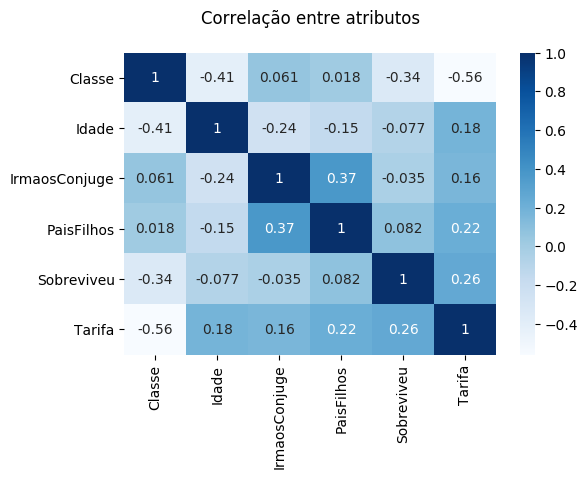

In [366]:
#Encontrar variaveis correlacionadas
fig, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlação entre atributos\n')
plt.show()

In [367]:
#A coluna Sobreviveu será descartar por conter muitos nulos e pouca correlação
#com a idade, que será o objeto dessa regressão
data.drop('Sobreviveu', axis=1, inplace=True)

In [368]:
data.isnull().sum()

Bilhete            0
Classe             0
Embarque           0
Idade            263
IrmaosConjuge      0
Nome               0
PaisFilhos         0
Sexo               0
Tarifa             0
dtype: int64

In [369]:
#Utilizar-se da engenharia de recursos pra criar uma coluna com base
#no título do nome.
data['Nome'].head()

IdPassageiro
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Nome, dtype: object

In [371]:
data['Titulo'] = data['Nome'].str.extract('(\w+)\.')

In [375]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [377]:
#Alguns títulos serão generalizados para facilitar a categorização
data['Titulo'].apply(lambda x: 'Outros' if x not in ['Master',
                                                    'Miss',
                                                    'Mr',
                                                    'Mrs'] else x).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Outros'], dtype=object)

In [379]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Master',
                                                    'Miss',
                                                    'Mr',
                                                    'Mrs'] else x)

In [392]:
#Traduzir Titulos
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [394]:
np.max(data['Idade'].loc[data['Titulo']=='Master'])

14.5

In [396]:
np.max(data['Idade'].loc[data['Titulo']=='Miss'])

63.0

In [397]:
np.min(data['Idade'].loc[data['Titulo']=='Miss'])

0.17

In [401]:
np.mean(data['Idade'].loc[data['Titulo']=='Mr'])

32.25215146299484

In [402]:
data['Titulo'] = data['Titulo'].map({'Master': 'menino',
                                     'Miss': 'solteira',
                                     'Mr': 'homem adulto',
                                     'Mrs': 'casada'})

In [403]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
casada,0,197
homem adulto,757,0
menino,61,0
solteira,0,260
